# Image Classification using HoG (10 points)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = "."
q1_path = path + "/Assignment2 Data/Q1/training/"


In [3]:
# Train and test set
train = []
test = []

N_train = 5
N_test = 5

dim = (128, 128)

# Suffix and postfix for dynamically create the file name of the image
suffix1 = "kraft"
suffix2 = "mc"
sep = "_"
extension = ".jpeg"

train_suffix1 = suffix1 + sep + "train"
train_suffix2 = suffix2 + sep + "train"

test_suffix1 = suffix1 + sep + "train"
test_suffix2 = suffix2 + sep + "train"


def read_images(path):
    imgs = []
    y = []
    for img in os.listdir(path):
        img_path = os.path.join(path, img)

        # Read the image logo of kraft and mc
        img1 = cv2.imread(path)
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

        # Resize the image
        img2 = cv2.resize(img2, dim)
        # Add the images to the training set
        imgs.append(img1)
        if "mc" in 
        y.append(0)
        y.append(1)

    return imgs, y


In [47]:
# Load train and test
train, y_train = read_images(train_suffix1, train_suffix2, extension, dim)
test, y_test = read_images(test_suffix1, train_suffix2, extension, dim)


In [48]:
def visualize_HoG(img, hog_descriptor, nbins, cell_size):

        # Reshape the feature vector to [number of blocks in x and y direction, number of cells per block in x and y direction, number of bins]
        # This will be useful later when we plot the feature vector, so that the feature vector indexing matches the image indexing
    hog_descriptor_reshaped = hog_descriptor.reshape(16,
                                                    16,
                                                    2,
                                                    2,
                                                     nbins).transpose((1, 0, 2, 3, 4))

    # Create an array that will hold the average gradients for each cell
    ave_grad = np.zeros((32, 32, nbins))

    # Create an array that will count the number of histograms per cell
    hist_counter = np.zeros((32, 32, 1))

    # Add up all the histograms for each cell and count the number of histograms per cell
    for i in range(2):
        for j in range(2):
            ave_grad[i:16 + i,
                    j:16 + j] += hog_descriptor_reshaped[:, :, i, j, :]

            hist_counter[i:16 + i,
                        j:16 + j] += 1

    # Calculate the average gradient for each cell
    ave_grad /= hist_counter

    # Calculate the total number of vectors we have in all the cells.
    len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

    # Create an array that has num_bins equally spaced between 0 and 180 degress in radians.
    deg = np.linspace(0, np.pi, nbins, endpoint=False)

    # Each cell will have a histogram with num_bins. For each cell, plot each bin as a vector (with its magnitude
    # equal to the height of the bin in the histogram, and its angle corresponding to the bin in the histogram).
    # To do this, create rank 1 arrays that will hold the (x,y)-coordinate of all the vectors in all the cells in the
    # image. Also, create the rank 1 arrays that will hold all the (U,V)-components of all the vectors in all the
    # cells in the image. Create the arrays that will hold all the vector positons and components.
    U = np.zeros((len_vecs))
    V = np.zeros((len_vecs))
    X = np.zeros((len_vecs))
    Y = np.zeros((len_vecs))

    # Set the counter to zero
    counter = 0

    # Use the cosine and sine functions to calculate the vector components (U,V) from their maginitudes. Remember the
    # cosine and sine functions take angles in radians. Calculate the vector positions and magnitudes from the
    # average gradient array
    for i in range(ave_grad.shape[0]):
        for j in range(ave_grad.shape[1]):
            for k in range(ave_grad.shape[2]):
                U[counter] = ave_grad[i, j, k] * np.cos(deg[k])
                V[counter] = ave_grad[i, j, k] * np.sin(deg[k])

                X[counter] = (cell_size[0] / 2) + (cell_size[0] * i)
                Y[counter] = (cell_size[1] / 2) + (cell_size[1] * j)

                counter = counter + 1

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Display the image
    ax1.set(title='Grayscale Image')
    ax1.imshow(img, cmap='gray')

    # Plot the feature vector (HOG Descriptor)
    ax2.set(title='HOG Descriptor')
    ax2.quiver(Y, X, U, V, color='white', headwidth=0,
            headlength=0, scale_units='inches', scale=3)
    ax2.invert_yaxis()
    ax2.set_aspect(aspect=1)
    ax2.set_facecolor('black')


In [43]:
def compute_HoG(imgs):

    img_size = (128, 128)  # h x w in pixels
    cell_size = (4, 4)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 8  # number of orientation bins

    # create HoG Object
    # winSize is the size of the image cropped to multiple of the cell size
    # all arguments should be given in terms of number of pixels
    hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                      img_size[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(
                                cell_size[1] * block_size[1], cell_size[0] * block_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins,
                            )

    features = []

    for i in range(len(imgs)):
        feature = hog.compute(imgs[i]).reshape(1, -1)
        features.append(feature)
        visualize_HoG(imgs[i], feature, nbins, cell_size)
    features = np.vstack(features)
    return features


/tmp/ipykernel_7045/3326107344.py:27: RuntimeWarning: invalid value encountered in divide
  ave_grad /= hist_counter


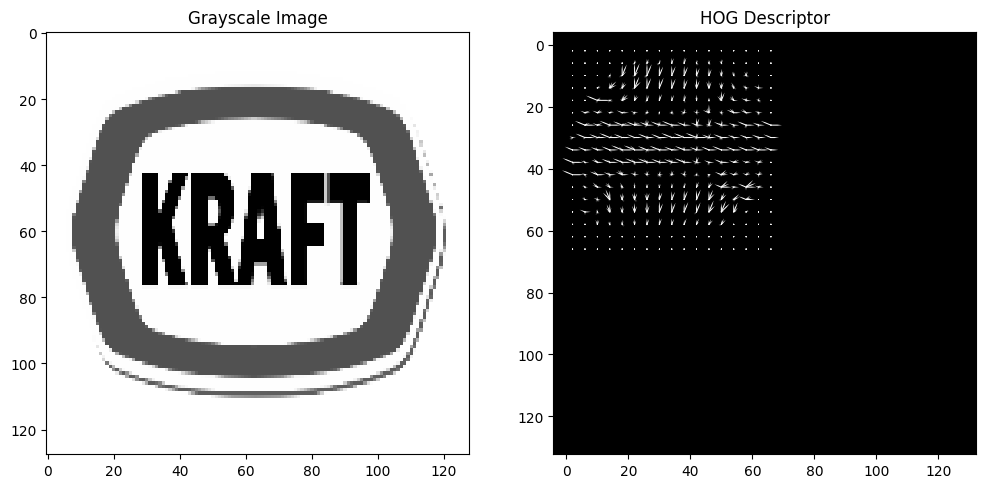

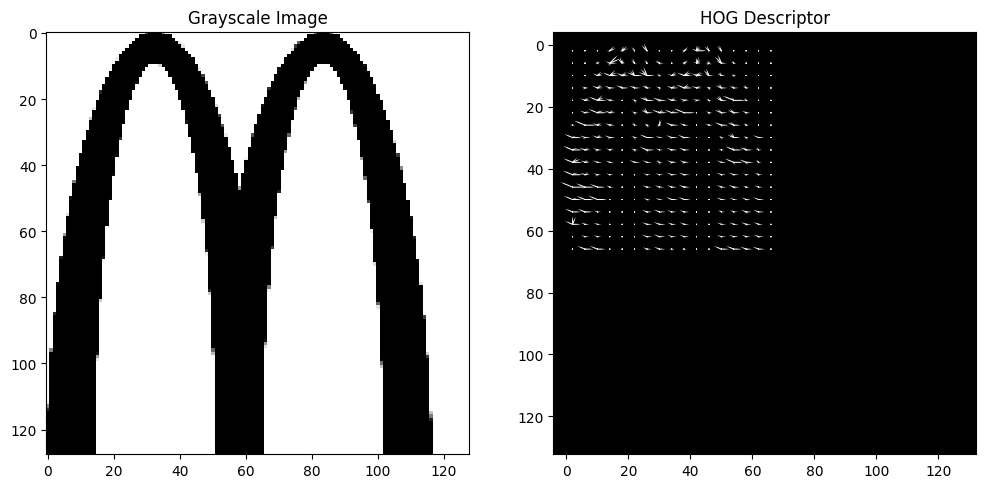

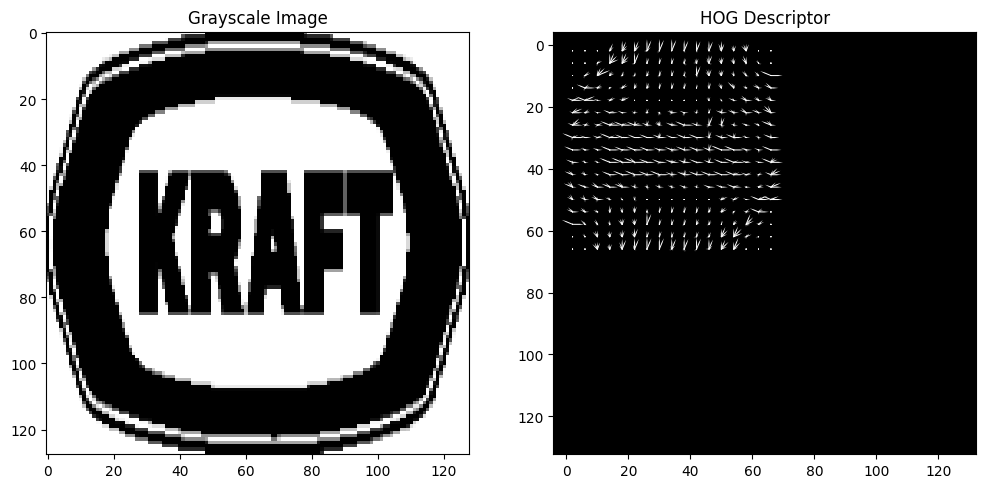

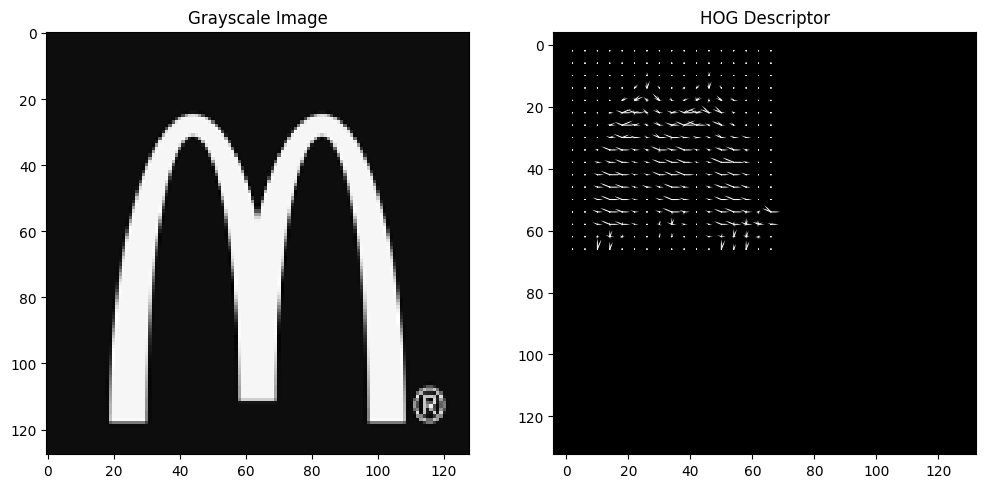

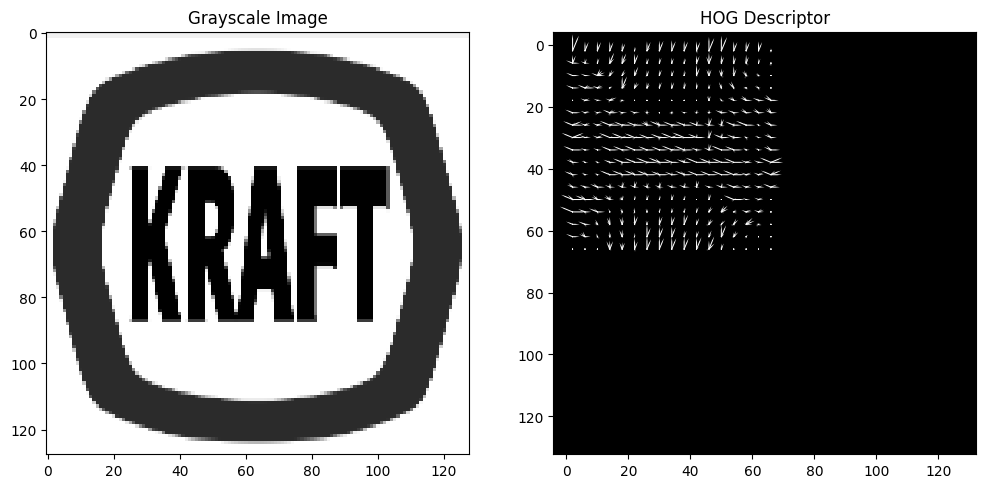

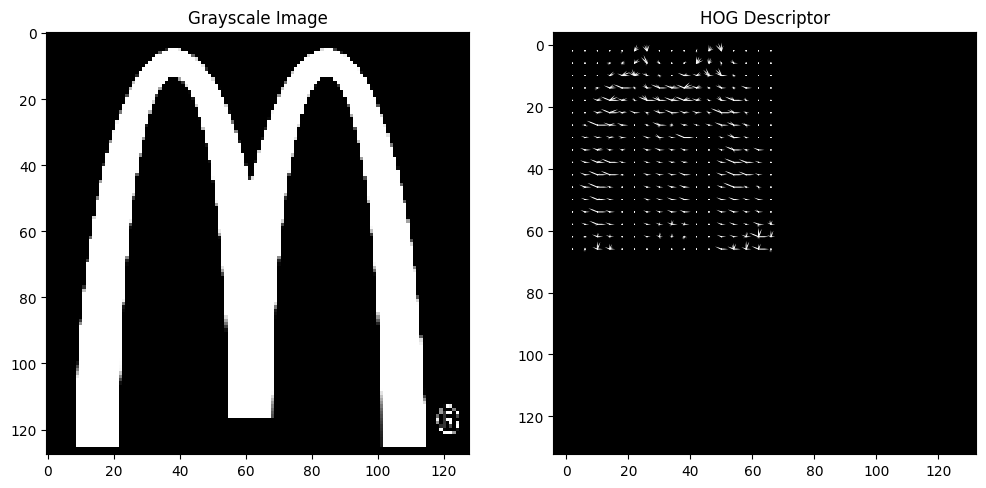

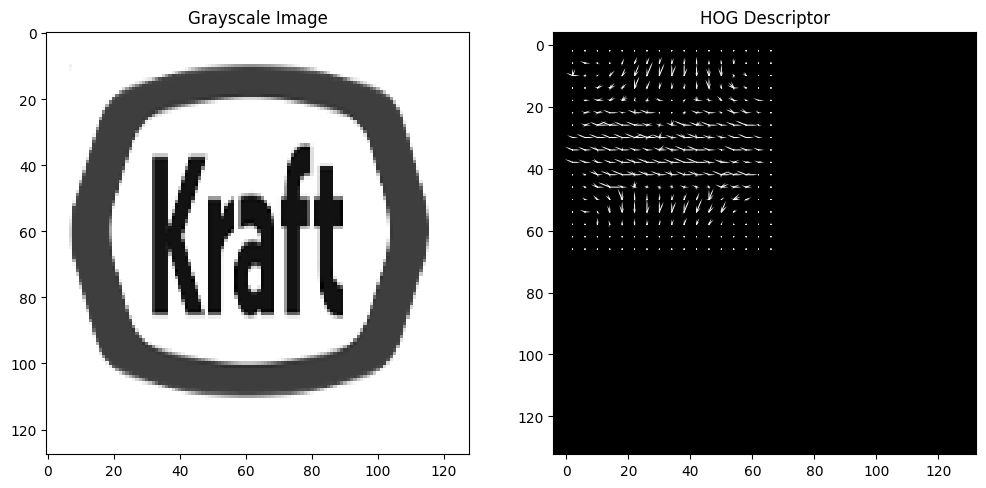

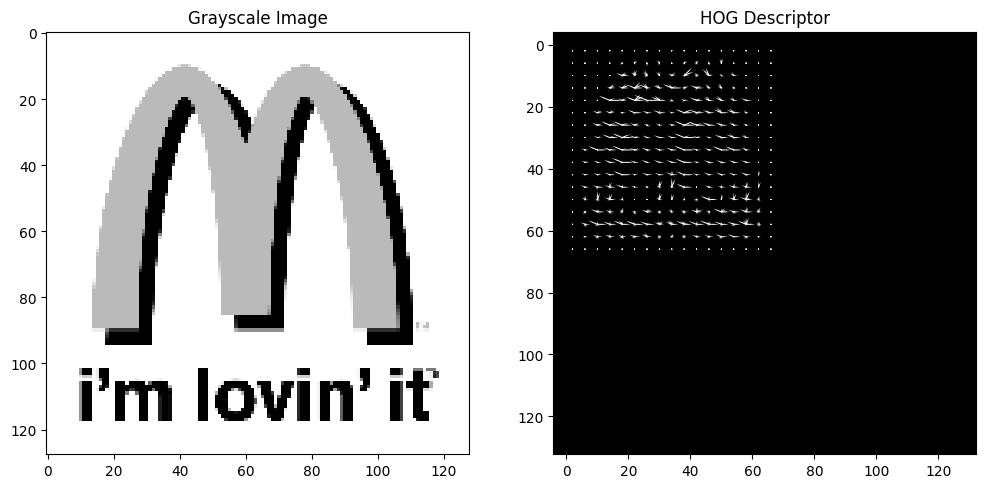

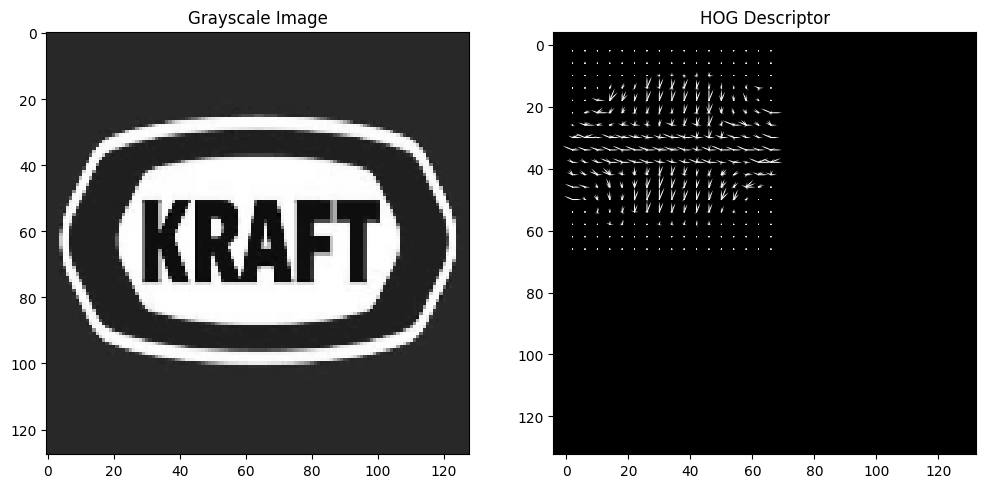

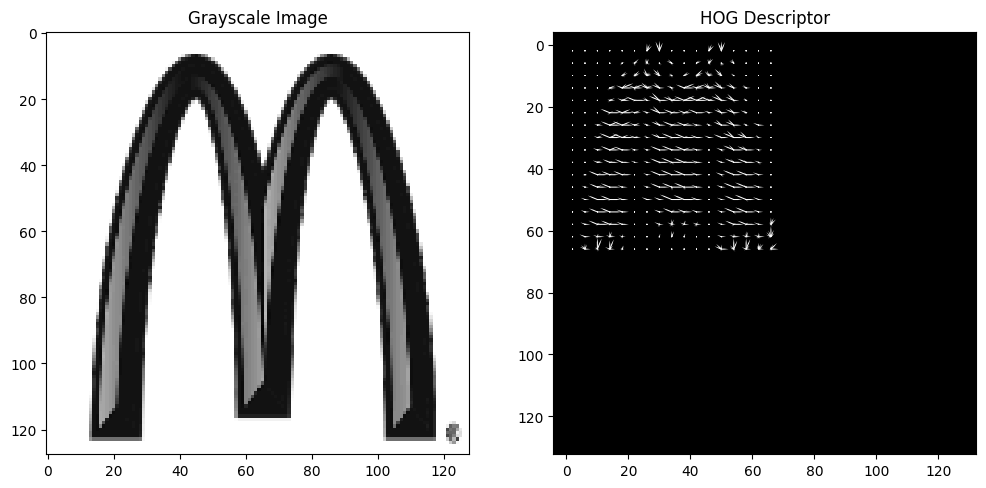

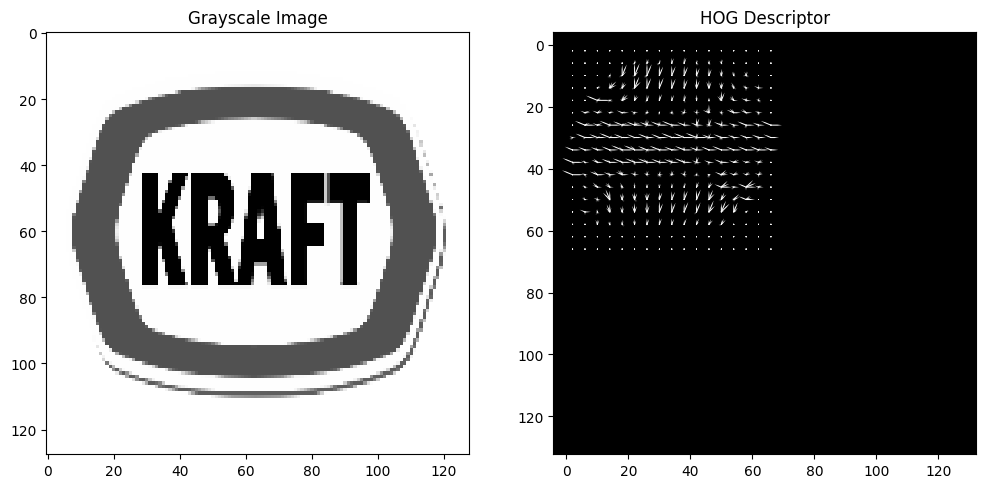

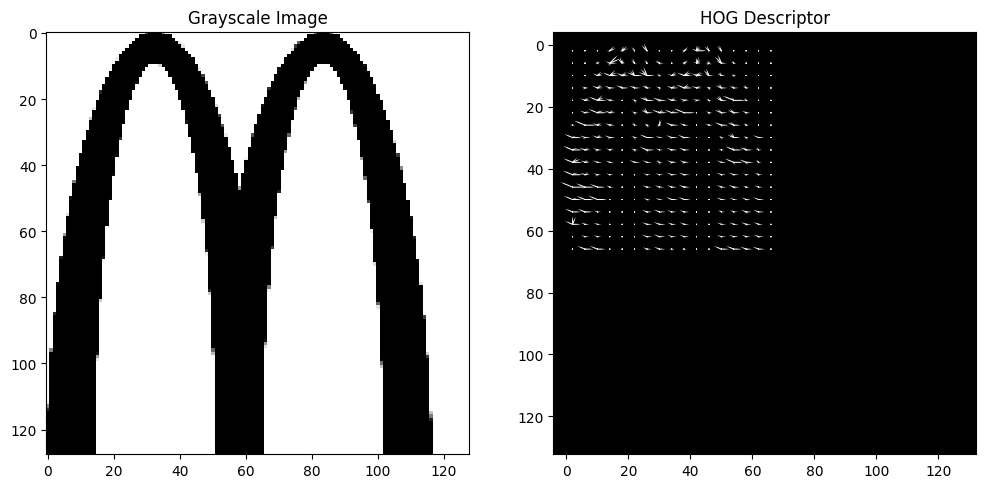

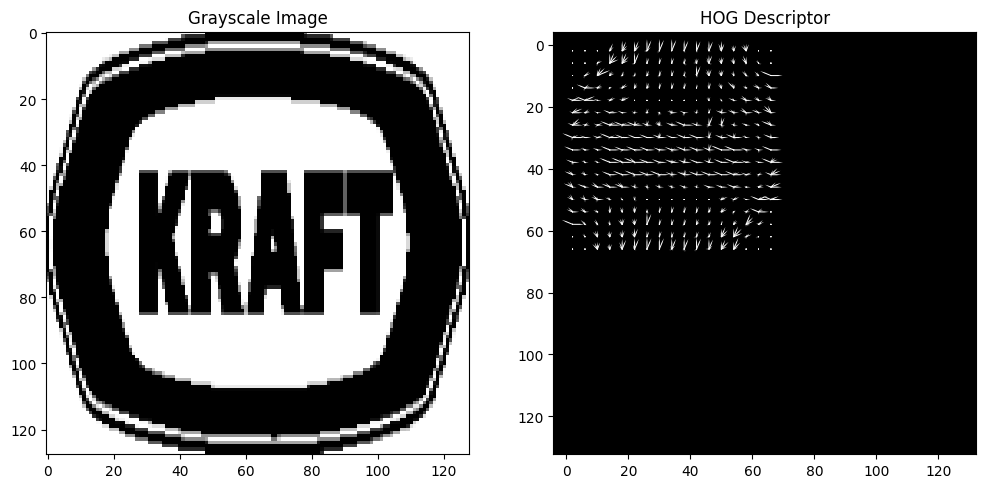

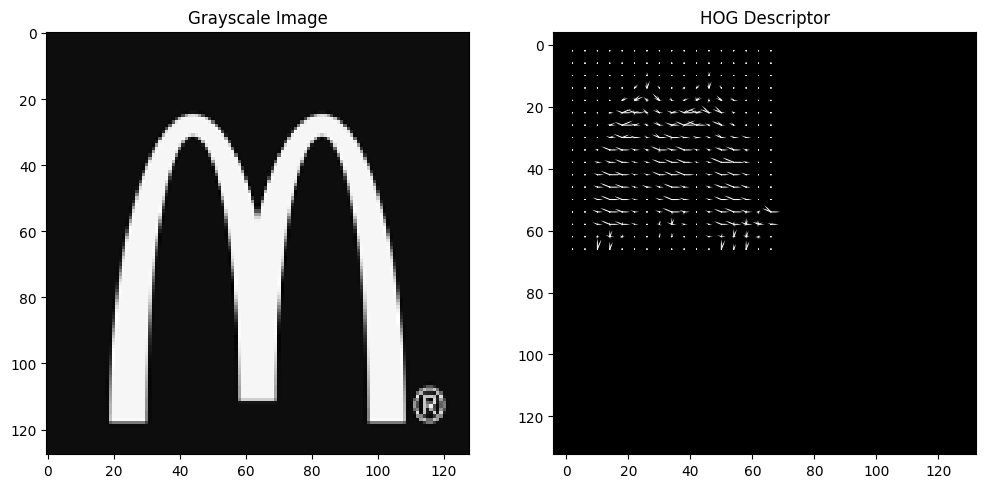

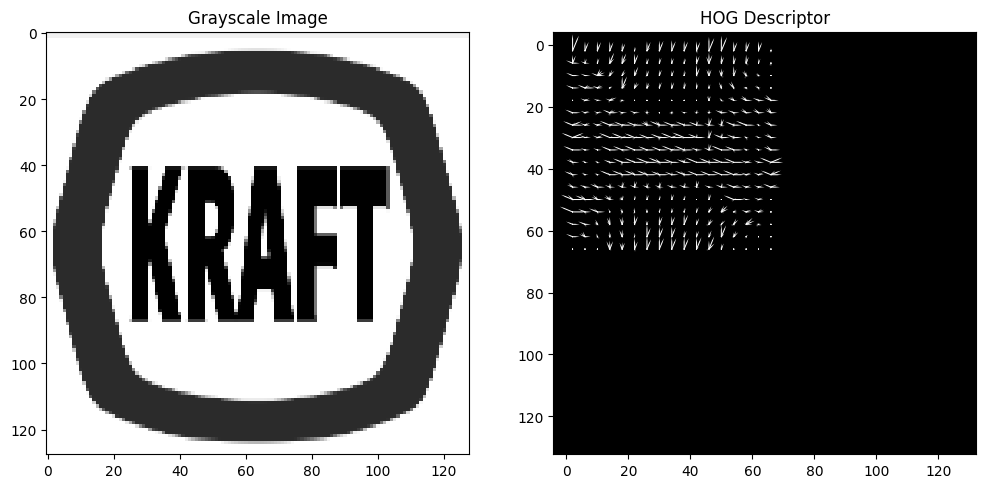

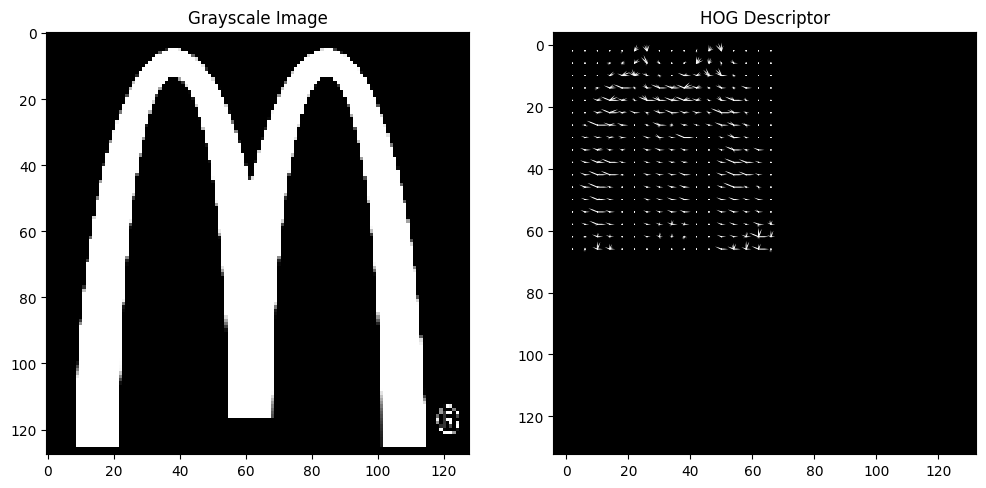

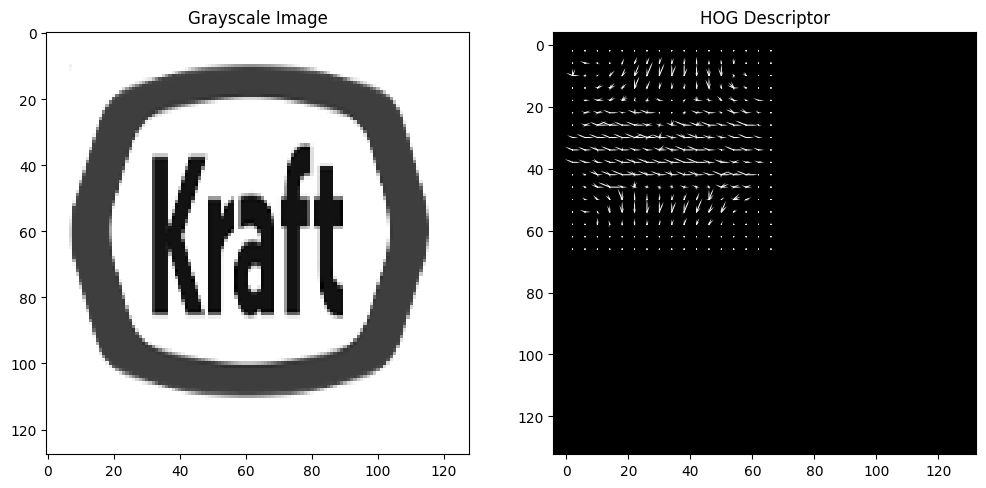

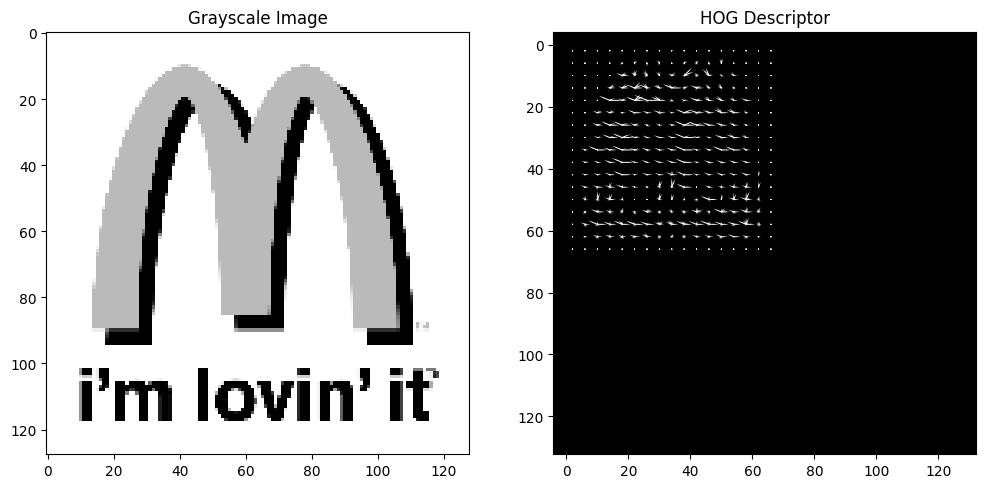

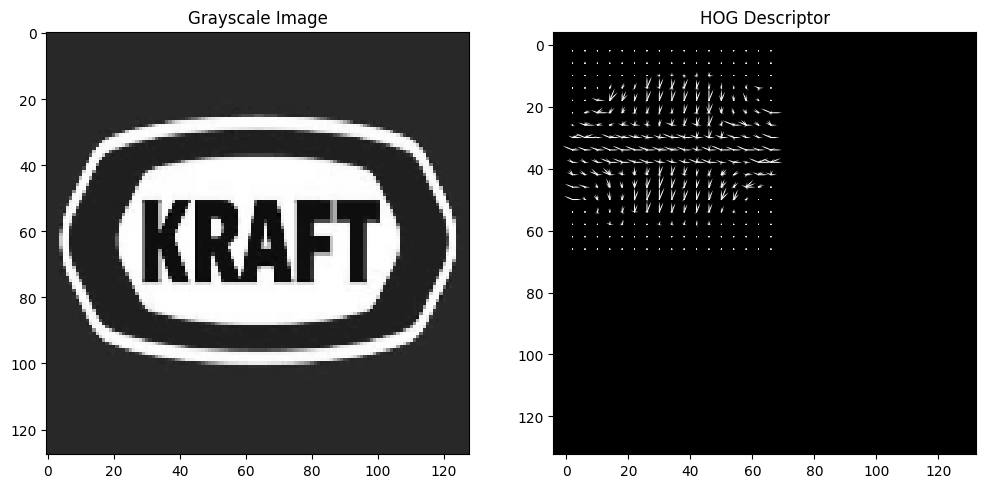

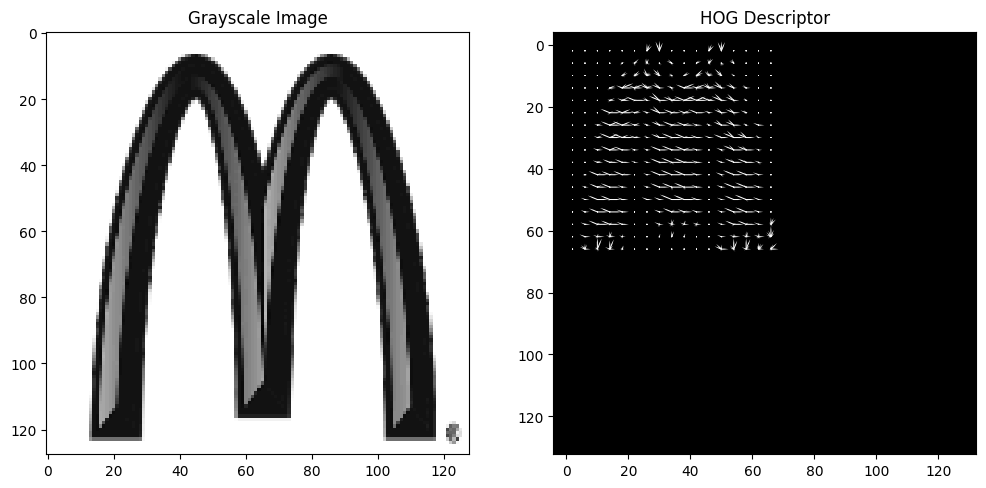

In [49]:
train_features = compute_HoG(train)
test_features = compute_HoG(test)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [8]:
knn = KNeighborsClassifier()
knn.fit(train_features, y_train)
y_pred = knn.predict(test_features)


In [9]:
accuracy_score(y_test, y_pred)

1.0

# Part 2

In [10]:
import cv2


In [11]:
path = "./"
q2_path = path + "Assignment2 Data/Q2/"


In [12]:
img1 = cv2.imread(q2_path + "image1.jpeg")
img2 = cv2.imread(q2_path + "image2.jpeg")
img3 = cv2.imread(q2_path + "image3.jpeg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)


In [13]:
""" 
Compute and returns:
- Keypoints
- Keypoints' descriptors
- Image with the corresponding keypoints 
"""


def sift(img):
    sift = cv2.SIFT_create()
    # Compute keypoints and descriptors
    kp, ds = sift.detectAndCompute(img, None)
    # Draw the keypoints on the image
    img1 = cv2.drawKeypoints(
        img, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return kp, ds, img1


In [14]:
# Compute and returns all the keypoints and the descriptors for the images
# given in input
def compute_kp(imgs):
    # List containing the keypoints for each image
    kps = []    # i.e. kps[1] contains the keypoints of the image imgs[1]
    # List containing the descriptots for each image
    dss = []    # i.e. dss[1] contains the descriptors of the image imgs[1]
    total = len(imgs)

    # Compute the number of rows
    columns = 2
    plt.figure(figsize=(10, 10))
    rows = int(np.ceil(total / columns))

    # Iterate over all images
    for i, img in enumerate(imgs):
        # Compute kp and ds and the resulting image
        kp, ds, img = sift(img)

        # Plot the image with the keypoints
        plt.subplot(rows, columns, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        kps.append(kp)
        dss.append(ds)
    plt.show()
    return kps, dss


In [15]:
# Compute and plot the matches for the input images given the respective keypoints and descriptors
def match_plot(img1, img2, ds1, ds2, kp1, kp2, title=""):

    # Match descriptors.
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.match(ds1, ds2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the matches across the two images
    img3 = cv2.drawMatches(
        img1, kp1, img2, kp2, matches[:20], None, flags=2)

    plt.figure(figsize=(10, 10))
    plt.title("Matches " + title)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img3)
    plt.show()

    return matches


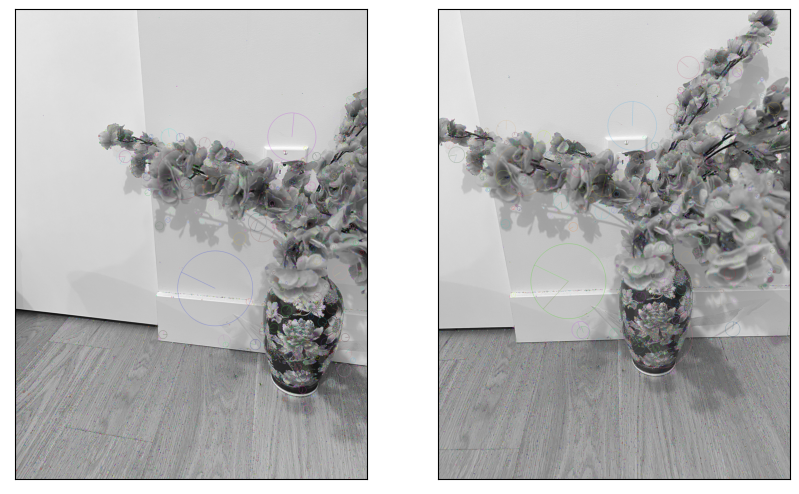

In [16]:
kps, dss = compute_kp([img1, img2])


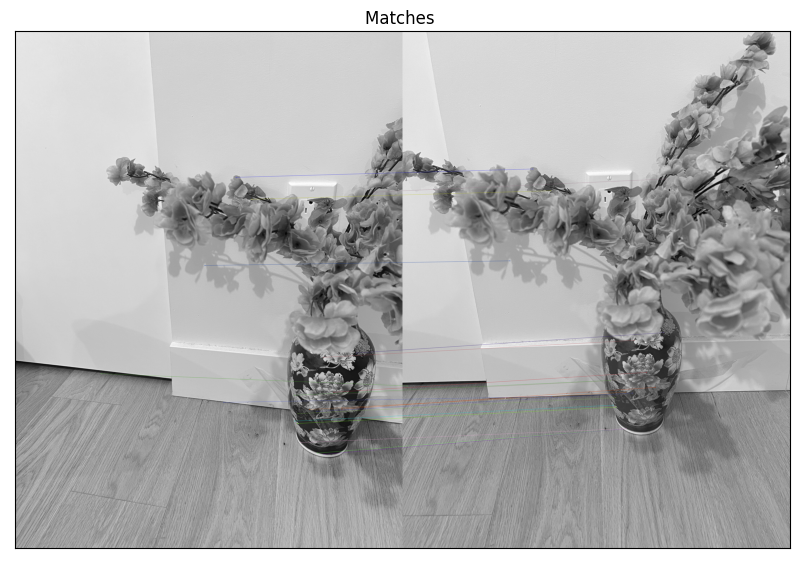

In [17]:
good = match_plot(
    img1, img2, dss[0], dss[1], kps[0], kps[1], title="")


In [18]:

def RANSAC(img1, kp1, kp2, good):
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good])
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good])
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)
    # Calculate Homography
    print(img1.shape)
    size = (img1.shape[1], img1.shape[0])
    homo_img = cv2.warpPerspective(img1, M, size)
    print(homo_img.shape)
    plt.imshow(homo_img, 'gray'), plt.show()
    return homo_img


In [19]:
def stiching(img1, img2):
    h, w = img1.shape
    # Create an empty output image with the same height as the input images and the chosen width
    output = np.zeros((h, 2*w), np.uint8)

    # Stich the images
    print(img2.shape)
    output[:, :w] = img1[:, :w] 
    output[:, w:] = img2[:, :w]
    print(output.shape)
    return output


(4032, 3024)
(4032, 3024)


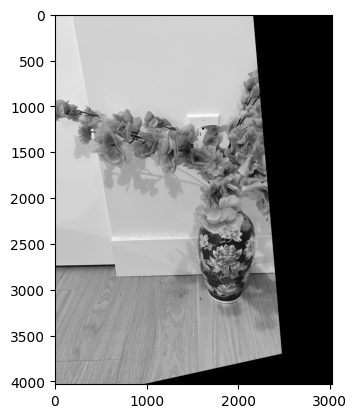

(4032, 3024)


In [20]:
img12 = RANSAC(img1,  kps[0], kps[1], good[:20])
print(img12.shape)


In [21]:
def blending(A, B):
    # generate Gaussian pyramid for A
    h, w = A.shape[1], A.shape[0]
    G = A.copy()
    gpA = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpA.append(G)
    # generate Gaussian pyramid for B
    G = B.copy()
    gpB = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpB.append(G)
    # generate Laplacian Pyramid for A
    lpA = [gpA[5]]
    for i in range(5, 0, -1):
        size = (gpA[i - 1].shape[1], gpA[i - 1].shape[0])
        GE = cv2.pyrUp(gpA[i], dstsize=size)
        L = cv2.subtract(gpA[i-1], GE)
        lpA.append(L)
    # generate Laplacian Pyramid for B
    lpB = [gpB[5]]
    for i in range(5, 0, -1):
        size = (gpB[i - 1].shape[1], gpB[i - 1].shape[0])
        GE = cv2.pyrUp(gpB[i], dstsize=size)
        L = cv2.subtract(gpB[i-1], GE)
        lpB.append(L)
    # Now add left and right halves of images in each level
    LS = []
    for la, lb in zip(lpA, lpB):
        rows, cols = la.shape
        ls = np.hstack((la[:, 0:cols//2], lb[:, cols//2:]))
        LS.append(ls)
    # now reconstruct
    ls_ = LS[0]
    for i in range(1, 6):
        size = LS[i].shape
        ls_ = cv2.pyrUp(ls_, dstsize=(LS[i].shape[1], LS[i].shape[0]))
        ls_ = cv2.add(ls_, LS[i])

    output = np.zeros((h, w), np.uint8)

    real = np.hstack((A[:, :cols//2], B[:, cols//2:]))
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.title('Pyramid_blending')
    plt.imshow(ls_, "gray")
    #plt.subplot(1, 2, 2)
    #plt.imshow(real, "gray")
    #plt.show()
    # cv2.imshow('Direct_blending.jpg',real)
    return ls_


(4032, 3024)
(4032, 6048)


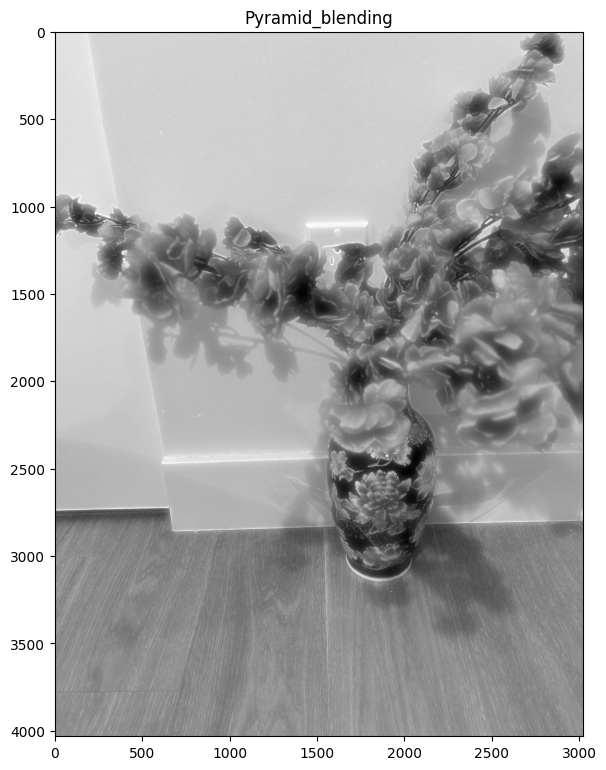

In [22]:
img12_cp = img12.copy()
img12 = stiching(img2, img12)
img12 = blending(img12, img2)


In [23]:
def linear_blending(img1, img2, alpha=0.5, scale=1):

    # [blend_images]

    # Find the height and width of the images
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    if scale != 0:
        blend_area = w1 #// scale
    else:
        blend_area = 0
    # Choose the width of the output image (the width should be greater than or equal to the sum of the widths of the input images)
    width = w1 + blend_area

    # Create an empty output image with the same height as the input images and the chosen width
    output = np.zeros((max(h1, h2), width), np.uint8)

    # Blend the two images using linear blending
    alpha = 0.8  # Set the blending ratio
    output[:, :w1] = img1[:, :] * alpha + output[:, :w1] * (1 - alpha)
    output[:, blend_area:] = img2[:, :] * \
        alpha + output[:, blend_area:] * (1 - alpha)

    # Save the output image
    cv2.imwrite('output.jpg', output)

    plt.title("Linear blending")
    plt.imshow(output, "gray")
    plt.show()
    return output


## Linear Blending

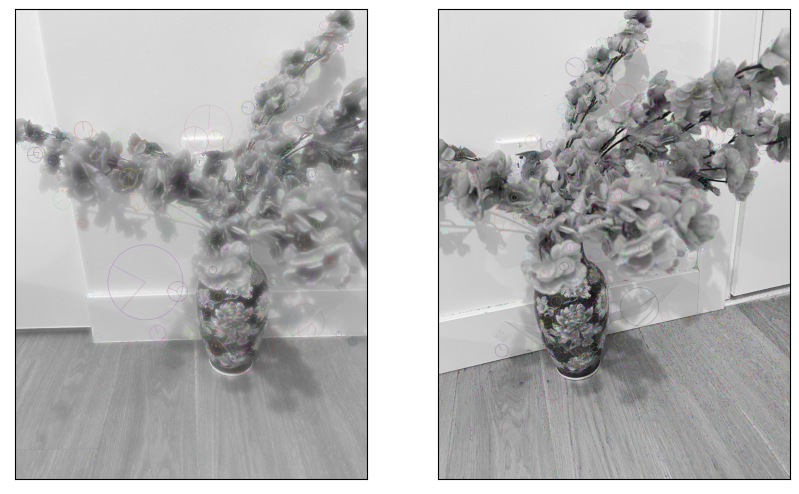

In [24]:
kps, dss = compute_kp([img12, img3])


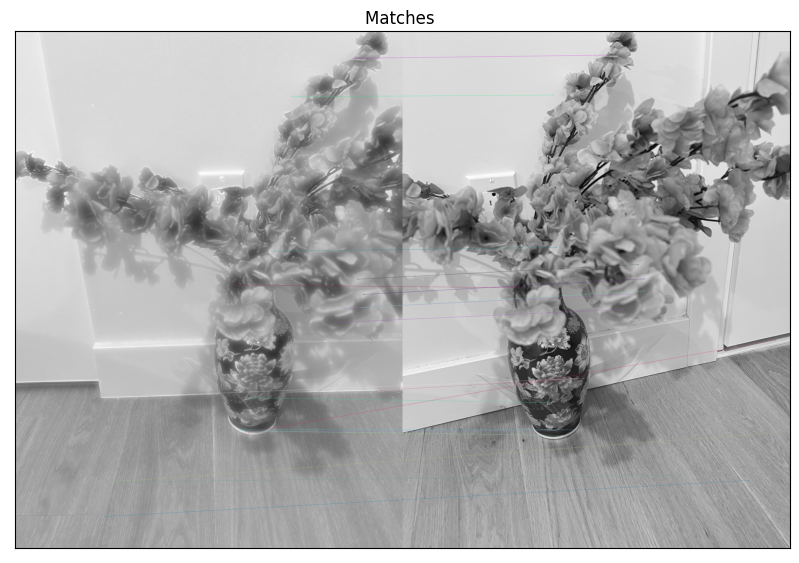

In [25]:
good = match_plot(
    img12, img3, dss[0], dss[1], kps[0], kps[1], title=""
)


(4032, 3024)
(4032, 3024)


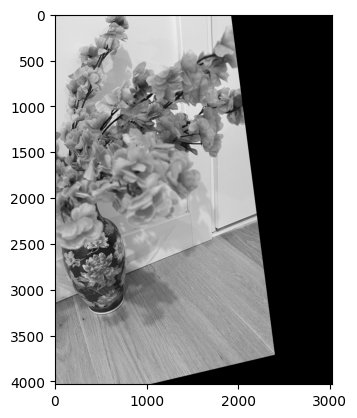

In [26]:
img13 = RANSAC(img3, kps[0], kps[1], good[:20])


(4032, 3024)
(4032, 6048)


array([[ 94,  94,  94, ..., 221, 223, 221],
       [ 94,  94,  94, ..., 221, 221, 222],
       [ 94,  94,  94, ..., 226, 221, 221],
       ...,
       [175, 170, 166, ..., 167, 167, 167],
       [175, 169, 165, ..., 167, 167, 167],
       [175, 168, 165, ..., 167, 167, 168]], dtype=uint8)

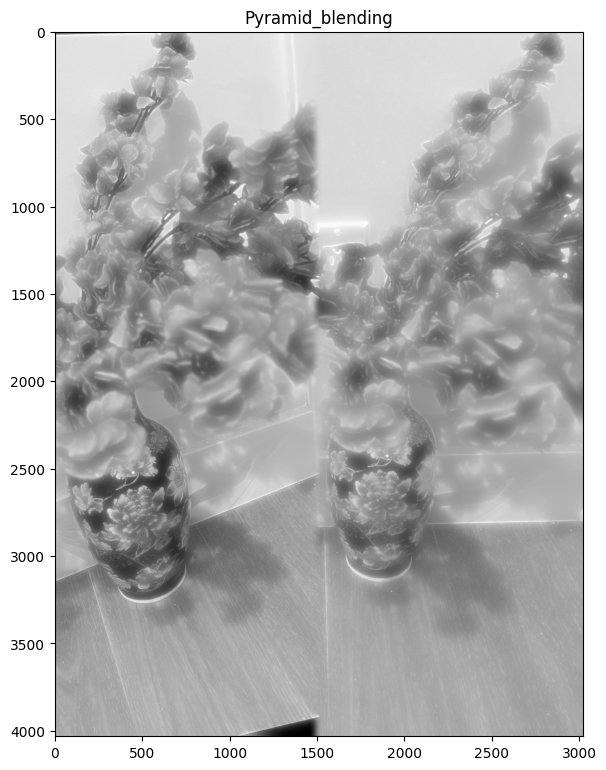

In [27]:
stiching(img12, img13)
blending(img13, img12)

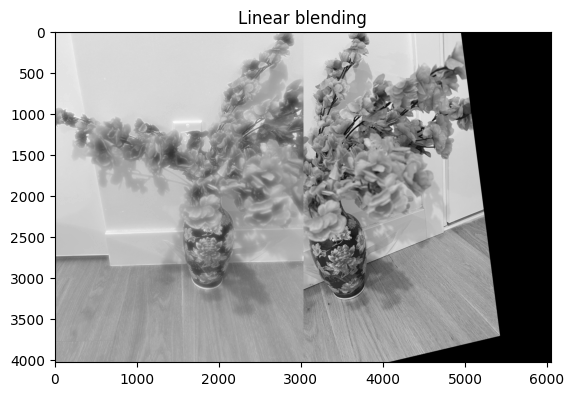

array([[185, 186, 186, ...,   0,   0,   0],
       [184, 184, 184, ...,   0,   0,   0],
       [184, 184, 184, ...,   0,   0,   0],
       ...,
       [131, 129, 130, ...,   0,   0,   0],
       [130, 129, 134, ...,   0,   0,   0],
       [129, 130, 136, ...,   0,   0,   0]], dtype=uint8)

In [28]:
linear_blending(img12, img13)


# Face detection (10 points)

In [29]:
import os
import random
import pickle
import scipy as sp


In [30]:
def load_dataset(path, size):
    # Compute the size of our dataset
    n = len(os.listdir(path))
    size_f = size[0] * size[1]
    imgs = np.zeros((n, *size))
    imgs_f = np.zeros((n, size_f))
    # This will iterate in the Folder
    for i, img in enumerate(os.listdir(path)):
        # Image Path
        new_path = os.path.join(path, img)
        try:
            # Read Image
            img_data = cv2.imread(new_path)
            img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
            img_data_f = img_data.flatten()
            imgs[i] = img_data
            imgs_f[i] = img_data_f
        except:
            pass
    return imgs, imgs_f


In [31]:
q3_path = path + "/Assignment2 Data/Q3/celeb_faces/drive-download-20230205T204823Z-001/"


In [32]:
# Load our dataset
size = (218, 178)
train, train_f = load_dataset(q3_path, size)
n = train.shape[0]
print(train.shape)


(400, 218, 178)


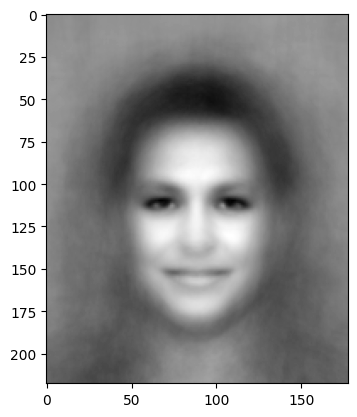

In [33]:
# Compute the mean face D
#train = train_f.reshape((n, *size))
D = np.mean(train, axis=0)
plt.imshow(D, "gray")


In [34]:
DDT = D @ D.T
eigs, vectors = sp.linalg.eigh(DDT)
# First 4 eigenvalues
print(eigs[:4])


[-7.16332812e-08 -1.11239248e-08 -2.55007380e-09 -1.96101164e-09]


In [35]:
def project(Q, X):
    return np.dot(Q.T, X)


def pca(X, k, D):

    X_cp = X
    x_centered = X_cp - D
    print(x_centered.shape, D.shape)

    # Compute svd
    u, s, vh = np.linalg.svd(x_centered, full_matrices=False)

    u_truncated = np.resize(u, (X_cp.shape[0], k))
    u_truncated = u[:X_cp.shape[0], :k]

    Z = project(u_truncated, X_cp)

    return Z, u_truncated


In [36]:
k = 2
X_train = train_f.T
Z, Q = pca(X_train[:, :100], k, D.flatten().reshape(-1, 1))


(38804, 100) (38804, 1)


(38804, 2)


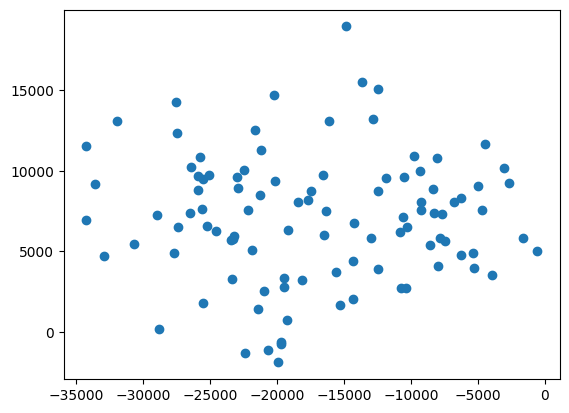

In [37]:
plt.scatter(Z[0, :], Z[1, :])
print(Q.shape)


(38804, 400) (38804, 1)
Reconstruction error with k=20: 6983.0671870116985


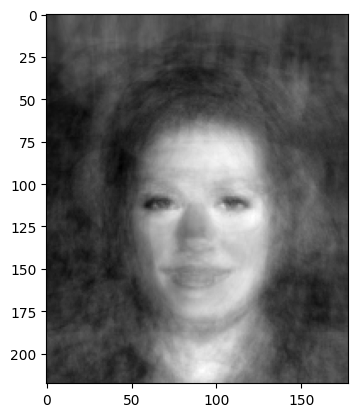

(38804, 400) (38804, 1)
Reconstruction error with k=10: 8512.546402846221


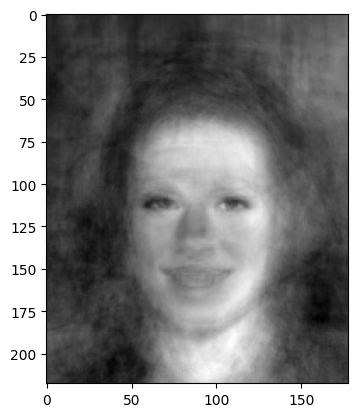

(38804, 400) (38804, 1)
Reconstruction error with k=5: 11550.811516773072


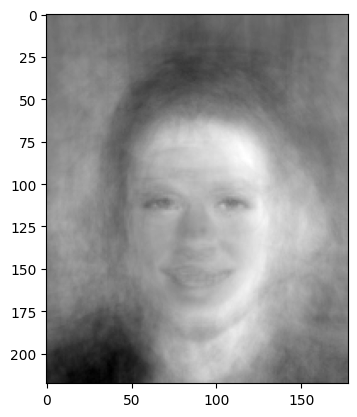

In [38]:
values = [20, 10, 5]
for k in values:
    Z, Q = pca(X_train[:, :], k, D.flatten().reshape(-1, 1))
    originals = Q @ Z
    print(
        f"Reconstruction error with k={k}: {np.mean(np.linalg.norm(originals - X_train, axis=0))}")
    plt.imshow(originals[:, 0].reshape(size), "gray")
    plt.show()


In [39]:
def face_recognition(img, win_size, Q, threshold):
    h, w = img.shape
    print()
    for i in range(w//win_size[1]):
        for j in range(h//win_size[0]):
            print("In the cycle")
            window = img[j*win_size[0]:(j+1)*win_size[0], i*win_size[1]: (i+1)*win_size[1], ]
            projection = project(Q, window.flatten())
            recontruction = Q @ projection
            if np.linalg.norm(window - recontruction.reshape(win_size)) < threshold:
                cv2.rectangle(
                    img, (i, j), (i + win_size[1], j + win_size[0]), (255, 0, 0), 2)
                plt.imshow(img, cmap="gray")
                plt.show()
                print("Face")
            else:
                print(np.linalg.norm(window - recontruction.reshape(win_size)))


In [40]:
Z, Q = pca(X_train[:, :], 10, D.flatten().reshape(-1, 1))


(38804, 400) (38804, 1)


In [41]:
# Load our test image
img_test = cv2.imread(path + "test.png")
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
print(img_test.shape)


(460, 860)


In [42]:
face_recognition(img_test, size, Q, 0)



In the cycle
6113.80876318499
In the cycle
8380.221137834315
In the cycle
7081.126016106375
In the cycle
9931.433538380648
In the cycle
8403.414135391478
In the cycle
8915.495242879848
In the cycle
7320.589377022669
In the cycle
9266.323334491093
